### Análise de Vendas - Projeto de Data Analysis

Este projeto tem como objetivo analisar dados de vendas para identificar:
- Categorias mais rentáveis
- Gargalos de faturamento
- Padrões de volume e receita

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dataset_vendas.csv')
df['data'] = pd.to_datetime(df['data'])

In [2]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   data                 1800 non-null   datetime64[ns]
 1   produto              1800 non-null   object        
 2   categoria            1800 non-null   object        
 3   regiao               1800 non-null   object        
 4   canal_venda          1800 non-null   object        
 5   quantidade           1800 non-null   int64         
 6   preco_unitario       1800 non-null   int64         
 7   desconto_percentual  1800 non-null   float64       
 8   receita_bruta        1800 non-null   int64         
 9   receita_liquida      1800 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 140.8+ KB


,data,quantidade,preco_unitario,desconto_percentual,receita_bruta,receita_liquida
count,1800,1800.000000,1800.000000,1800.000000,1800.000000,1800.00000
mean,2023-07-05 00:45:36,4.555556,1080.466667,0.058361,4892.816667,4617.79000
min,2023-01-01 00:00:00,1.000000,120.000000,0.000000,120.000000,102.00000
25%,2023-04-01 00:00:00,3.000000,350.000000,0.000000,1050.000000,1000.00000
50%,2023-07-04 00:00:00,5.000000,500.000000,0.050000,2800.000000,2520.00000
75%,2023-10-07 00:00:00,7.000000,1400.000000,0.100000,7000.000000,6545.00000
max,2023-12-31 00:00:00,8.000000,3500.000000,0.150000,28000.000000,28000.00000
std,NaN,2.286880,1017.229015,0.057951,5556.541779,5275.86964


### Pergunta: Qual é a receita líquida total do período?

In [2]:
df['receita_liquida'].sum()

np.float64(8312022.0)

**Insinght:**
A empresa gerou uma receita líquida total significativa no período analisado, indicando bom desempenho geral de vendas.

### Pergunta: Qual é o ticket médio por venda?

In [3]:
df['receita_liquida'].mean()

np.float64(4617.79)

**Insinght:**
O ticket médio indica o valor médio gerado por venda, servindo como base para analisar a eficiência e comparações entre canais e categorias.

### Pergunta: Quais produtos geram mais receita líquida?

In [4]:
df.groupby('produto')['receita_liquida'].sum().sort_values(ascending=False)

produto
Notebook           1938825.0
Smartphone         1710660.0
Armário            1142640.0
Mesa Escritório     897540.0
Monitor             770550.0
Cadeira Gamer       637212.5
Curso Online        310075.0
Webcam              283878.0
Fone Bluetooth      267942.5
Teclado             153425.0
Livro Técnico       124790.0
Mouse                74484.0
Name: receita_liquida, dtype: float64

**Insinght:**
 Alguns produtos concentram a maior parte da receita, assim sugerindo foco estratégico nesses itens para aumentar o faturamento.

### Pergunta: Qual categoria é responsável pela maior parte da receita?

In [3]:
df.groupby('categoria')['receita_liquida'].sum().sort_values(ascending=False)

categoria
Eletrônicos    5199764.5
Móveis         2677392.5
Educação        310075.0
Livros          124790.0
Name: receita_liquida, dtype: float64

**Insinght:**
 A categoria líder em receita se destaca como a principal potência financeira, sendo estratégica para investimentos.

### Pergunta: Qual é a categoria com alto volume e baixa receita:

In [5]:
df.groupby('categoria').agg(
    quantidade_total=('quantidade', 'sum'),
    receita_total=('receita_liquida', 'sum')
    ).assign(
        ticket_medio=lambda x: x['receita_total'] / x['quantidade_total']
    ).sort_values('ticket_medio')

,quantidade_total,receita_total,ticket_medio
categoria,,,
Livros,665,124790.0,187.654135
Educação,659,310075.0,470.523520
Eletrônicos,4813,5199764.5,1080.358300
Móveis,2063,2677392.5,1297.815075


**Insinght:**
O ticket médio evidencia diferenças na monetização entre os canais, explicando por que alguns vendem muito em quantidade, mas geram menos receita.

### Pergunta: Qual canal de venda performa melhor em receita média?

In [6]:
df.groupby('canal_venda')['receita_liquida'].mean().sort_values(ascending=False)

canal_venda
Marketplace    4732.215815
Online         4565.773043
Loja Física    4553.798544
Name: receita_liquida, dtype: float64

**Insinght:**
O canal com maior receita média por venda tem o melhor retorno.

### Pergunta: Qual região gera mais receita líquida?

In [25]:
df.groupby('regiao')['receita_liquida'].sum().sort_values(ascending=False)

regiao
Sudeste         1830409.5
Centro-Oeste    1747939.0
Nordeste        1607119.5
Sul             1564298.0
Norte           1562256.0
Name: receita_liquida, dtype: float64

**Insinght:**
A região Sudeste concentra a maior parte da receita líquida. 

### Pergunta: Existem regiões com potencial pouco explorado?

In [26]:
df.groupby('regiao').agg(
    vendas=('quantidade','sum'),
    receita=('receita_liquida','sum')
).sort_values('receita')

,vendas,receita
regiao,,
Norte,1597,1562256.0
Sul,1490,1564298.0
Nordeste,1639,1607119.5
Centro-Oeste,1773,1747939.0
Sudeste,1701,1830409.5


**Insinght:**
Indicando as regiões com grande potenciais para receber investimentos.

### Pergunta: O desconto aumenta volume, mas reduz receita líquida?

In [25]:
df.groupby('desconto_percentual').agg(
    quantidade_media=('quantidade','mean'),
    receita_media=('receita_liquida','mean')
)

,quantidade_media,receita_media
desconto_percentual,,
0.00,4.683646,5020.040214
0.05,4.418605,4735.888081
0.10,4.605898,4477.367292
0.15,4.356083,3762.221068


**Insinght:**
Descontos mais elevados não aumentam de forma significativa o volume médio de vendas e reduzem a receita média.

### Pergunta: Qual percentual de desconto parece menos prejudicial?

In [5]:
df.groupby('desconto_percentual')['receita_liquida'].mean().sort_values(ascending=False)

desconto_percentual
0.00    5020.040214
0.05    4735.888081
0.10    4477.367292
0.15    3762.221068
Name: receita_liquida, dtype: float64

**Insinght:**
O desconto de 5% apresenta menor impacto negativo na receita média quando comparado aos outros descontos.

### Pergunta: Existem picos sazonais de vendas?

In [7]:
df.groupby(df['data'].dt.to_period('M'))['receita_liquida'].sum()

data
2023-01    731856.5
2023-02    624751.5
2023-03    723677.0
2023-04    722757.0
2023-05    638769.5
2023-06    672032.0
2023-07    777333.0
2023-08    615303.5
2023-09    537792.5
2023-10    739745.0
2023-11    768236.5
2023-12    759768.0
Freq: M, Name: receita_liquida, dtype: float64

**Insinght:**
A análise mensal indica a presença de sazonalidade, com o aumento da receita em determinados meses e assim sugerindo oportunidades para campanhas direcionadas.

### Pergunta: Qual é o mês com maior receita?

In [49]:
receita_mensal = df.groupby(df['data'].dt.to_period('M'))['receita_liquida'].sum()
receita_mensal.sort_values(ascending=False).head(1)

data
2023-07    777333.0
Freq: M, Name: receita_liquida, dtype: float64

**Insinght:**
O mês com maior receita indica um pico de demanda, representando uma oportunidade estratégica para campanhas promocionais e planejamento de estoque.

### O que eu recomendaria para aumentar receita:

In [19]:
df.groupby(['categoria', 'canal_venda'])['receita_liquida'] \
  .mean() \
  .sort_values(ascending=False)


categoria    canal_venda
Móveis       Online         6196.806569
             Marketplace    5975.726950
             Loja Física    5833.446746
Eletrônicos  Marketplace    5257.436441
             Loja Física    4774.199438
             Online         4750.773913
Educação     Online         2181.395349
             Marketplace    2161.842105
             Loja Física    1938.541667
Livros       Online          870.800000
             Marketplace     827.636364
             Loja Física     794.000000
Name: receita_liquida, dtype: float64

**Recomendação:**
Com base nas análises realizadas, recomenda-se priorizar a categoria Móveis no canal Online, expandir estratégias do Marketplace e atuar para o aumento do ticket médio da loja física.


### Pergunta: Onde a empresa está perdendo dinheiro?

In [ ]:
df[df['desconto_percentual'] >= 0.10] \
  .groupby('categoria')['receita_liquida'].mean() \
  .sort_values()


categoria
Livros          806.250000
Educação       1909.836066
Eletrônicos    4545.879902
Móveis         5170.098870
Name: receita_liquida, dtype: float64

**Recomendação:**
Prefira os descontos ate 5% pos maior que isso afeta negativamente a receita.

### Análises Visuais:

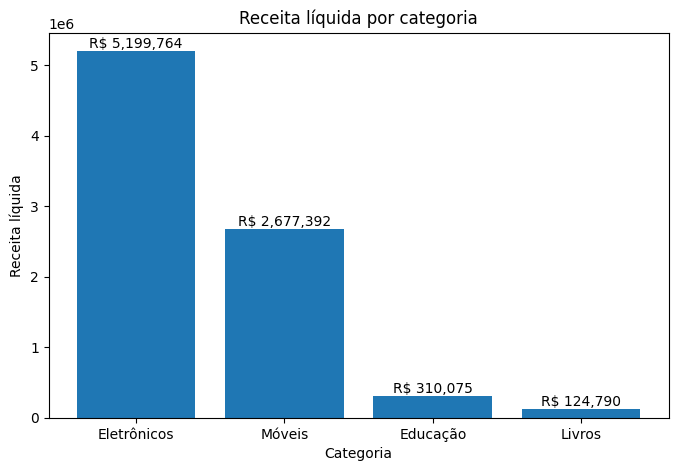

In [3]:
receita_categoria = (
    df.groupby('categoria')['receita_liquida']
      .sum()
      .sort_values(ascending=False)
)

plt.figure(figsize=(8, 5))
bars = plt.bar(receita_categoria.index, receita_categoria.values)

plt.title('Receita líquida por categoria')
plt.xlabel('Categoria')
plt.ylabel('Receita líquida')

for bar in bars:
    valor = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        valor,
        f'R$ {valor:,.0f}',
        ha='center',
        va='bottom'
    )

plt.show()


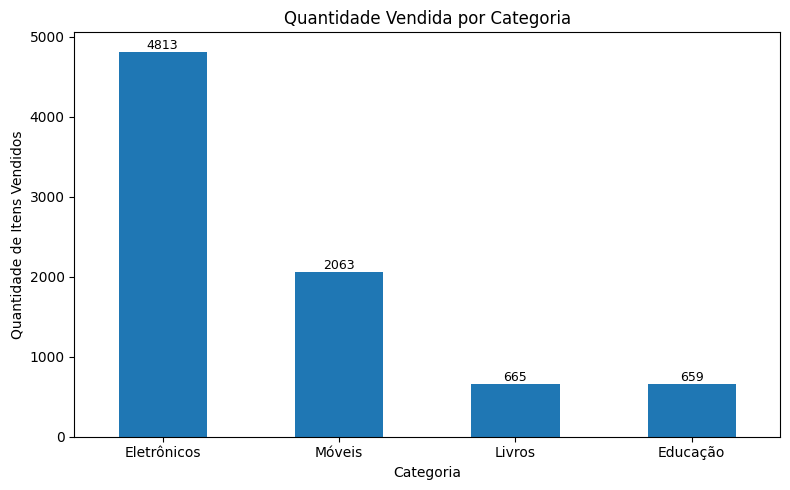

In [5]:
quantidade_categoria = (
    df.groupby('categoria')['quantidade']
      .sum()
      .sort_values(ascending=False)
)

plt.figure(figsize=(8, 5))
ax = quantidade_categoria.plot(kind='bar')

plt.title('Quantidade Vendida por Categoria', fontsize=12)
plt.xlabel('Categoria')
plt.ylabel('Quantidade de Itens Vendidos')

for i, v in enumerate(quantidade_categoria.values):
    ax.text(i, v, f'{v}', ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



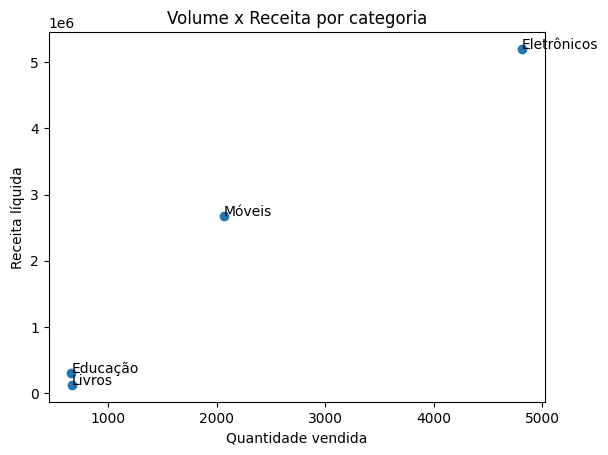

In [4]:
resumo = df.groupby('categoria').agg(
    quantidade=('quantidade', 'sum'),
    receita=('receita_liquida', 'sum')
)

plt.scatter(resumo['quantidade'], resumo['receita'])


for categoria in resumo.index:
    plt.text(
        resumo.loc[categoria, 'quantidade'],
        resumo.loc[categoria, 'receita'],
        categoria
    )

plt.xlabel('Quantidade vendida')
plt.ylabel('Receita líquida')
plt.title('Volume x Receita por categoria')
plt.show()